In [1]:
import asyncio
import cognee


2025-04-30T14:54:11.306050 [info     ] Deleted old log file: /Users/handekafkas/Documents/local-code/new-cognee/cognee/logs/2025-04-30_13-33-09.log [cognee.shared.logging_utils]

HTTP Request: GET https://raw.githubusercontent.com/BerriAI/litellm/main/model_prices_and_context_window.json "HTTP/1.1 200 OK"
/Users/handekafkas/Library/Caches/pypoetry/virtualenvs/cognee-jGxqfqQ0-py3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm

2025-04-30T14:54:14.614192 [warning  ] Ontology file 'None' not found. Using fallback ontology at http://example.org/empty_ontology [OntologyAdapter]
2025-04-30T14:54:14.614870 [info     ] Lookup built: 0 classes, 0 individuals [OntologyAdapter]

# Basic setup

In [2]:
# cognee knowledge graph will be created based on this text
text = """
Natural language processing (NLP) is an interdisciplinary
subfield of computer science and information retrieval.
"""

In [3]:
print("Adding text to cognee:")
print(text.strip())
# Add the text, and make it available for cognify
await cognee.add(text)
print("Text added successfully.\n")


2025-04-30T14:54:14.746929 [info     ] Model not found in LiteLLM's model_cost. [cognee.shared.logging_utils]
Langfuse client is disabled since no public_key was provided as a parameter or environment variable 'LANGFUSE_PUBLIC_KEY'. See our docs: https://langfuse.com/docs/sdk/python/low-level-sdk#initialize-client

Adding text to cognee:
Natural language processing (NLP) is an interdisciplinary
subfield of computer science and information retrieval.




LiteLLM completion() model= gpt-4o-mini; provider = openai
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
EmbeddingRateLimiter initialized: enabled=False, requests_limit=60, interval_seconds=60
selected model name for cost calculation: openai/gpt-4o-mini-2024-07-18
selected model name for cost calculation: openai/text-embedding-3-large
2025-04-30T14:54:16.103704 [info     ] Pipeline run started: `4b84e400-23fc-5976-bbb4-f8ee303eed81` [run_tasks(tasks: [Task], data)]
2025-04-30T14:54:16.104162 [info     ] Coroutine task started: `resolve_data_directories` [run_tasks_base]
2025-04-30T14:54:16.104884 [info     ] Coroutine task started: `ingest_data` [run_tasks_base]/Users/handekafkas/Library/Caches/pypoetry/virtualenvs/cognee-jGxqfqQ0-py3.11/lib/python3.11/site-packages/dlt/destinations/impl/sqlalchemy/merge_job.py:201: SAWarning: Table 'file_metadata' already exists within the given MetaData - not copying.
  staging_table_obj = table_obj.to_metadata(
/Users/han

Text added successfully.



In [4]:
# Use LLMs and cognee to create knowledge graph
await cognee.cognify()
print("Cognify process complete.\n")


2025-04-30T14:54:16.395097 [info     ] Model not found in LiteLLM's model_cost. [cognee.shared.logging_utils]
2025-04-30T14:54:16.395691 [warning  ] Ontology file 'None' not found. Using fallback ontology at http://example.org/empty_ontology [OntologyAdapter]
2025-04-30T14:54:16.396729 [info     ] Lookup built: 0 classes, 0 individuals [OntologyAdapter]
2025-04-30T14:54:16.406077 [info     ] Pipeline run started: `5a8d7dd2-fd20-53c3-a8f7-45edf0f84677` [run_tasks(tasks: [Task], data)]
2025-04-30T14:54:16.406441 [info     ] Coroutine task started: `classify_documents` [run_tasks_base]
2025-04-30T14:54:16.406742 [info     ] Coroutine task started: `check_permissions_on_documents` [run_tasks_base]
2025-04-30T14:54:16.413513 [info     ] Async Generator task started: `extract_chunks_from_documents` [run_tasks_base]
2025-04-30T14:54:16.417771 [info     ] Coroutine task started: `extract_graph_from_data` [run_tasks_base]
2025-04-30T14:54:16.418491 [info     ] Model not found in LiteLLM's mode

Cognify process complete.



In [5]:
query_text = "Tell me about NLP"
print(f"Searching cognee for insights with query: '{query_text}'")

Searching cognee for insights with query: 'Tell me about NLP'


In [6]:
from cognee.api.v1.search import SearchType

# Query cognee for insights on the added text
search_results = await cognee.search(query_type=SearchType.INSIGHTS, query_text=query_text)



selected model name for cost calculation: openai/text-embedding-3-large
selected model name for cost calculation: openai/text-embedding-3-large

In [7]:
# Display results
for result_text in search_results:
    print(result_text)

({'created_at': 1746017656416, 'updated_at': datetime.datetime(2025, 4, 30, 12, 54, 16, 416000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['text']}, 'type': 'DocumentChunk', 'belongs_to_set': None, 'text': '\nNatural language processing (NLP) is an interdisciplinary\nsubfield of computer science and information retrieval.\n', 'chunk_size': 36, 'chunk_index': 0, 'cut_type': 'paragraph_end', 'id': UUID('af7dc18b-4818-5bae-acc7-f886c2932baf')}, {'source_node_id': UUID('af7dc18b-4818-5bae-acc7-f886c2932baf'), 'target_node_id': UUID('bc338a39-64d6-549a-acec-da60846dd90d'), 'relationship_name': 'contains', 'updated_at': datetime.datetime(2025, 4, 30, 12, 54, 29, 658259, tzinfo=datetime.timezone.utc)}, {'created_at': 1746017661816, 'updated_at': datetime.datetime(2025, 4, 30, 12, 54, 21, 816000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields'

## Assigning scores to nodes in the graph
In this section, we show how to assign scores to nodes in the graph. We will use the page rank
algorithm for this purpose.

First, we get the graph (knowledge_graph) from the cognee engine.

In [8]:
from cognee.infrastructure.databases.graph import get_graph_engine
graph_engine = await get_graph_engine()
knowledge_graph = graph_engine.graph
print("Graph engine loaded successfully.\n")
print("Graph object:")
print(knowledge_graph.number_of_nodes(), 'nodes')
print(knowledge_graph.number_of_edges(), 'edges')

Graph engine loaded successfully.

Graph object:
930 nodes
914 edges


Then, we inspect the nodes and its data in the graph.

In [9]:
# Print the first 10 nodes in the graph with their data
nodes_dict = knowledge_graph.nodes(data=True)
for node in list(nodes_dict)[:10]:
    print('---',node)

--- (UUID('a244724f-3087-55d1-83f6-03abab613487'), {'created_at': 1745938597192, 'updated_at': datetime.datetime(2025, 4, 29, 14, 56, 37, 192000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['name']}, 'type': 'TableType', 'belongs_to_set': None, 'name': '_dlt_loads', 'description': 'Table: _dlt_loads', 'id': UUID('a244724f-3087-55d1-83f6-03abab613487')})
--- (UUID('ec94ecca-6f04-5127-9d0a-f622b0893251'), {'created_at': 1745938597193, 'updated_at': datetime.datetime(2025, 4, 29, 14, 56, 37, 193000, tzinfo=datetime.timezone.utc), 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_fields': ['properties']}, 'type': 'TableRow', 'belongs_to_set': None, 'name': '_dlt_loads:1745938590.355844', 'is_a': {'id': 'a244724f-3087-55d1-83f6-03abab613487', 'created_at': 1745938597192, 'updated_at': 1745938597192, 'ontology_valid': False, 'version': 1, 'topological_rank': 0, 'metadata': {'index_f

The node data consists of a few fields:

In [10]:
node[1].keys()

dict_keys(['created_at', 'updated_at', 'ontology_valid', 'version', 'topological_rank', 'metadata', 'type', 'belongs_to_set', 'name', 'is_a', 'description', 'properties', 'id'])

We can see how the graph looks, using nx drawing tools.

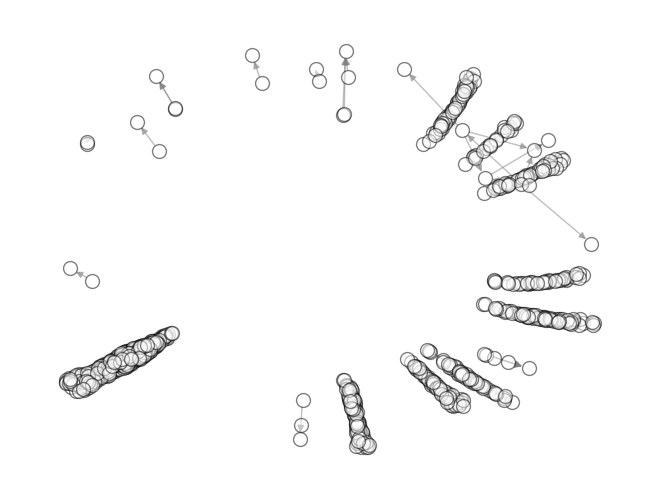

In [12]:
import matplotlib.pyplot as plt

import networkx as nx


pos = nx.spring_layout(knowledge_graph, seed=42)  # positions for all nodes
nx.draw(knowledge_graph, pos, with_labels=False, node_size=100, node_color='white',
        edge_color='gray',
        edgecolors='black', alpha=0.5)
plt.show()

We can now add a new field: page rank score. We first compute them using the networkx library.

In [13]:
import networkx as nx
ranks = nx.pagerank(knowledge_graph)

We can take a look at the ranks of the first 10 nodes.

In [14]:
for node in list(ranks)[:10]:
    print(node, '/rank:', ranks[node])

a244724f-3087-55d1-83f6-03abab613487 /rank: 0.0010850203820849888
ec94ecca-6f04-5127-9d0a-f622b0893251 /rank: 0.0005862681130862192
a9c0572e-3dec-5729-8453-f627bd010b98 /rank: 0.0010850203820849888
84c8e4a0-8551-5d3c-a724-6738f342a0d5 /rank: 0.0005862681130862192
a44c5a8b-ed77-5f32-863f-7994fa541427 /rank: 0.0010850203820849888
30f578f0-cce2-5d8a-bab0-c93752f4cf9a /rank: 0.0005862681130862192
13520d77-eb3e-5ab2-bdef-c2a0eab53b73 /rank: 0.02003760660403824
37c6967d-f3aa-5239-a3c3-fdbe5930b1a5 /rank: 0.0005862681130862192
a3add2e5-9166-5f6b-b2dd-e6739bb1e958 /rank: 0.0005862681130862192
b77bb8d8-6ad3-5376-8acf-fa3601f41423 /rank: 0.0005862681130862192


Finally, we can get a feeling of the distribution of the ranks.

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.hist(list(ranks.values()), bins=60)
plt.title('Page rank distribution')

As we can see, some nodes have a very high score, while most of them are around 0.01. Let's see
the data of the node with the highest score.

In [51]:
# Sort the ranks dictionary by value in descending order
sorted_ranks = sorted(ranks.items(), key=lambda x: x[1], reverse=True)

In [ ]:
sorted_ranks[0]

In [ ]:
knowledge_graph.nodes[sorted_ranks[0][0]]  # get the node data